In [1]:
# Import necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Retail Analysis with Walmart Data

* Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

#### In this project we focused to answer the following questions:
#### A.Basic Statistics tasks

1. Which store has maximum sales
2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
3. Which store/s has good quarterly growth rate in Q3’2012
4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
5. Provide a monthly and semester view of sales in units and give insights

#### B.Statistical Model
1. For Store 1 – Build  prediction models to forecast demand
    *Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
    *Change dates into days by creating new variable.

### Data Understanding

In the file Walmart_Store_sales, there are sales data available for 45 stores This is the historical data that covers sales from 2010-02-05 to 2012-11-01 .

The data contains these features:
- Store - the store number
- Date - the week of sales
- Weekly_Sales -  sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

In [2]:
# Load dataset
data=pd.read_csv('Walmart_Store_sales.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### Data Preprocessing

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# checking for missing values
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
data.shape

(6435, 8)

In [6]:
# show dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# Convert date to datetime format and show dataset information
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Analysis Tasks

### A) Basic Statistical tasks:

### 1.Which store has maximum sales?
##### In order to find out the maximum sales, I have created a new variable called ‘total_sales’. Then groupby stores and find the sum of the weekly sales of each store. This will give me the maximum sales.

In [8]:
total_sales=data.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=0)

In [9]:
total_sales

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
19    206634862.0
31    199613906.0
23    198750618.0
24    194016021.0
11    193962787.0
28    189263681.0
41    181341935.0
32    166819246.0
18    155114734.0
22    147075649.0
12    144287230.0
26    143416394.0
34    138249763.0
40    137870310.0
35    131520672.0
8     129951181.0
17    127782139.0
45    112395341.0
21    108117879.0
25    101061179.0
43     90565435.0
15     89133684.0
7      81598275.0
42     79565752.0
9      77789219.0
29     77141554.0
16     74252425.0
37     74202740.0
30     62716885.0
3      57586735.0
38     55159626.0
36     53412215.0
5      45475689.0
44     43293088.0
33     37160222.0
Name: Weekly_Sales, dtype: float64

In [10]:
# Maximum Sales

pd.DataFrame(total_sales).head()

,Weekly_Sales
Store,
20,301397792.0
4,299543953.0
14,288999911.0
13,286517704.0
2,275382441.0


In [11]:
# Minimum Sales

pd.DataFrame(total_sales).tail()

,Weekly_Sales
Store,
38,55159626.0
36,53412215.0
5,45475689.0
44,43293088.0
33,37160222.0


##### Store-20 has the maximum sales of $301397792.0

##### Store-33 has the minimum sales of $37160222.0

### 2.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
##### To find out the maximum standard deviation, create a new variable and then group it by stores and find the standard deviation.

####                                         Maximum standard deviation

In [12]:
std_sales = data.groupby('Store')['Weekly_Sales'].std().round(3).sort_values(ascending=0)

In [13]:
pd.DataFrame(std_sales).head()

,Weekly_Sales
Store,
14,317569.949
10,302262.063
20,275900.563
4,266201.442
13,265506.996


##### Store - 14 has a maximum standard deviation = $317569.949

#### Coefficient of mean to standard deviation

In [14]:
store14 = data[data.Store == 14].Weekly_Sales

In [15]:
store14

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64

In [16]:
Coefficient_of_variantion=store14.std()/store14.mean()*100
Coefficient_of_variantion.round(2)

15.71

##### Coefficient of mean to Standard Deviation = 15.71%

##### Store-14 has a maximum standard deviation = $317,569.949 and the Coefficient of Mean to Standard Deviation = 15.71%

### 3.Which store/s has good quarterly growth rate in Q3’2012
##### First, we will find the Q2 sales and then Q3 sales, take out the difference and then find the growth rate.

In [17]:
q2_sales= data[((data['Date']>="2012-04-01")&(data['Date']<="2012-06-30"))].groupby('Store')['Weekly_Sales'].sum().round()
q3_sales= data[((data['Date']>="2012-07-01")&(data['Date']<="2012-09-30"))].groupby('Store')['Weekly_Sales'].sum().round()

In [18]:
pd.DataFrame({'Q2 Sales':q2_sales,
              'Q3 Sales':q3_sales,
              'Difference':(q3_sales-q2_sales),
              'Growth Rate':(q3_sales-q2_sales)/q3_sales*100}).sort_values(by=['Growth Rate'],ascending=0).head()

,Q2 Sales,Q3 Sales,Difference,Growth Rate
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.869323
7,7613594.0,7322394.0,-291200.0,-3.976841
35,10753571.0,10252123.0,-501448.0,-4.891163
26,13218290.0,12417575.0,-800715.0,-6.448240
39,20191586.0,18899955.0,-1291631.0,-6.834043


##### Q2 sales has always higher than Q3 sales so No store shown quaterly growth rate in Q3'2012, although store 16 has maximum growth rate as compared to others.

### 4.Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together?
##### We have 4 Holiday Events, 
##### (1) Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13, 
##### (2) Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13, 
##### (3) Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13, 
##### (4) Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13.
##### Now calculate the holiday event sales of each of the events and then find the non-holiday sales. 

In [19]:
#Holiday Events:

Super_Bowl = ['12-02-10', '11-02-11', '10-02-12', '8-02-13']
Labour_Day = ['10-09-10', '9-09-11', '7-09-12', '6-09-13']
Thanksgiving = ['26-11-10', '25-11-11', '23-11-12', '29-11-13']
Christmas = ['31-12-10', '30-12-11', '28-12-12', '27-12-13']

In [20]:
# Calculating holiday events sales
Super_Bowl_sales = data.loc[data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean().round(2)
Labour_Day_sales = data.loc[data.Date.isin(Labour_Day)]['Weekly_Sales'].mean().round(2)
Thanksgiving_sales = data.loc[data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round(2)
Christmas_sales = data.loc[data.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)

In [21]:
Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales

(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [22]:
#Non-holiday Sales:
non_holiday_sales = data[(data['Holiday_Flag']== 0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

1041256.38

In [23]:
result = pd.DataFrame([{'Super Bowl Sales':Super_Bowl_sales,
              'Labour Day Sales':Labour_Day_sales,
              'Thanksgiving Sales':Thanksgiving_sales,
              'Christmas Sales':Christmas_sales,
              'Non Holiday Sales':non_holiday_sales}]).T

result

,0
Super Bowl Sales,1079127.99
Labour Day Sales,1042427.29
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
Non Holiday Sales,1041256.38


##### Here Thanksgiving has the highest sales (1,471,273.43) than non-holiday sales (1,041,256.38).

### 5.Provide a monthly and semester view of sales in units and give insights

##### Plotting a month-wise bar graph for weekly sales to get an idea about which month has the maximum sales and then will plot  a year-wise bar graph for weekly sales to know which year has the highest weekly sales. Also will plot the semester-wise bar graph for weekly sales to get some insights about the semester's weekly sales.

In [24]:
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year

In [25]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


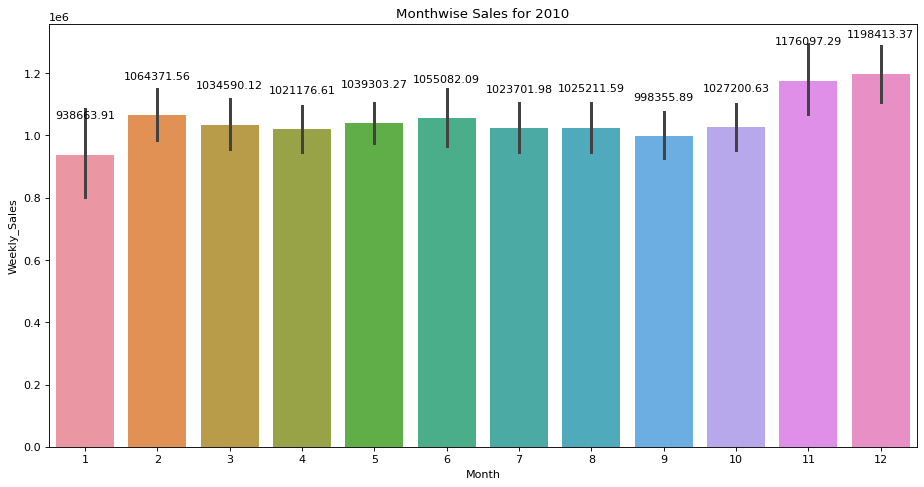

In [26]:
# Sales for the Year - 2010

plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=data, 
                     x=data[data.Year==2010]['Month'], 
                     y=data[data.Year==2010]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2010')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

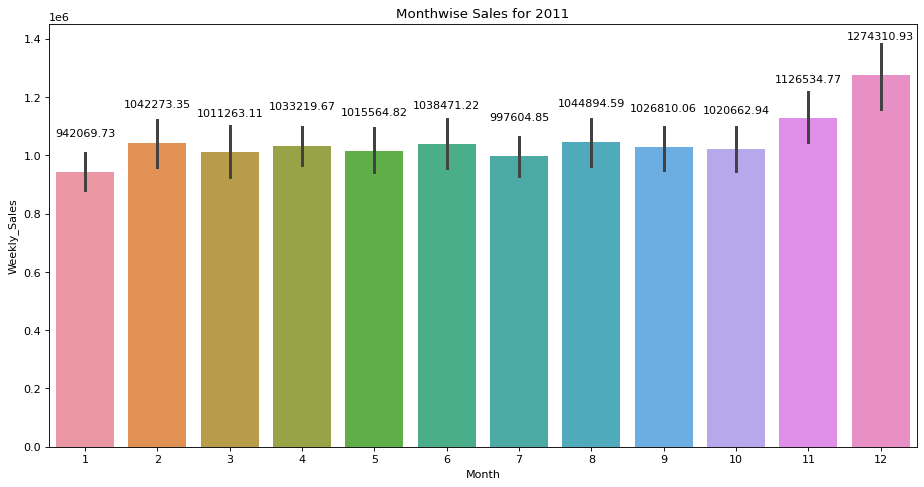

In [27]:
# Sales for the Year - 2011

plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=data, x=data[data.Year==2011]['Month'], y=data[data.Year==2011]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2011')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

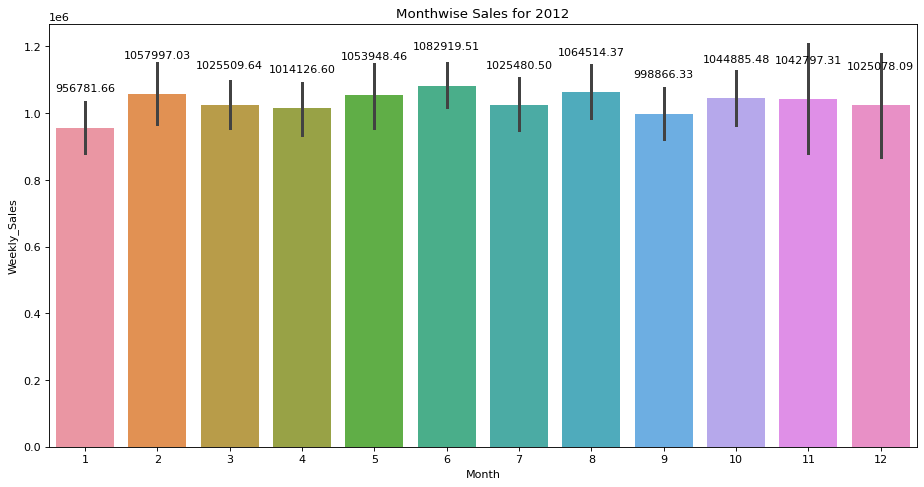

In [28]:
# Sales for the Year - 2012

plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=data, x=data[data.Year==2012]['Month'], y=data[data.Year==2012]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2012')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

Text(0.5, 1.0, 'Monthwise Sales')

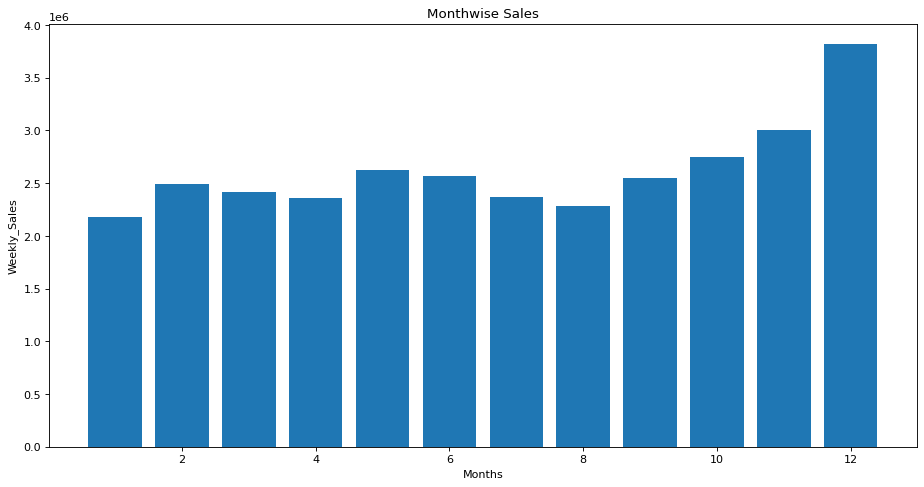

In [29]:
# Monthwise Sales

plt.figure(figsize=(14,7), dpi=80)
plt.bar(data['Month'], data['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 800x560 with 0 Axes>

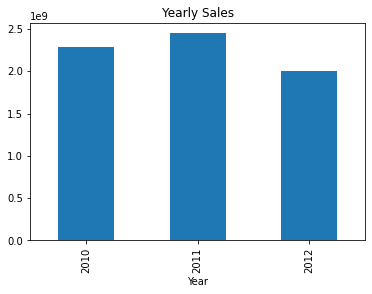

In [30]:
# Yearly Sales

plt.figure(figsize=(10,7), dpi=80)
data.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

In [31]:
#Semesterwise Sales
data ['semester'] = np.where(data['Date'].dt.month.le(6),'H1','H2')

In [32]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,H1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,H2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,H1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,H1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,H1


In [33]:
data['semester']

0       H1
1       H2
2       H1
3       H1
4       H1
        ..
6430    H2
6431    H1
6432    H2
6433    H2
6434    H2
Name: semester, Length: 6435, dtype: object

<AxesSubplot: xlabel='Year,semester'>

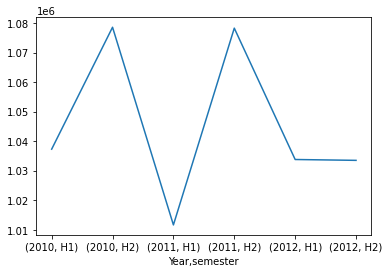

In [34]:
data.groupby(['Year','semester'])['Weekly_Sales'].mean().plot()

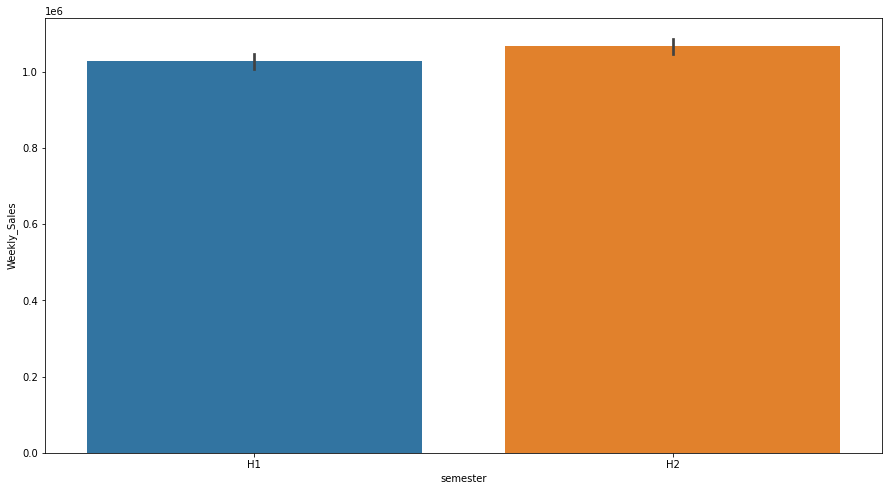

In [35]:
plt.figure(figsize =(15,8))
semester=sns.barplot(x='semester',y='Weekly_Sales',data=data)

#### 1) Year 2010 has the highest sales and 2012 has the lowest sales. 
#### (2) December month has the highest weekly sales. 
#### (3) Semester 2 has the highest weekly sales.
#### (4) Year 2011 has the highest weekly sales.


### B.Model Building
##### Build prediction models to forecast demand (Modeling)

#### (1) Statistical Model

In [36]:
import statsmodels.formula.api as sm
model=sm.ols('Weekly_Sales~CPI+Unemployment+Fuel_Price+Temperature+Holiday_Flag',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           5.93e-34
Time:                        13:31:23   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.727e+06   7.98e+04     21.646      0.000    1.57e+06    1.88e+06
CPI          -1598.8717    195.127     -8.194      0.000   -1981.385   -1216.358
Unemployment -4.155e+04   3972.660    -10.460      0.000   -4.93e+04   -3.38e+04
Fuel_Price   -1.017e+04   1.58e+04     -0.645      0.519   -4.11e+04    2.07e+04
Temperature   -724.1715    400.461     -1.808      0.071   -1509.207      60.864
Holiday_Flag  7.489e+04   2.76e+04      2.710      0.007    2.07e+04    1.29e+05
==============================================================================
Omnibus:                      365.109   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.212
Skew:                           0.633   Prob(JB):                     3.81e-94
Kurtosis:                       3.007   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Remark: The statistical model does not give a good accuracy and a lot of data manipulation needs to be done to get a good accuracy.

#### Defining dependent and independent variables. Here, store, fuel price, CPI, unemployment, day, month, and year are the independent variables and weekly sales is the dependent variable. Now, it’s time to train the model. Import train_test_split from sklearn.model_selection and train 80% of the data and test on the rest 20% of the data.

In [37]:
#Define independent and dependent variable
# Select features and target 
x=data[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y=data['Weekly_Sales']

In [38]:
from sklearn.model_selection import train_test_split
# Split data to train and test (0.80:0.20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [39]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### (2) Linear Regression model

In [40]:
# Import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression 

print('Linear Regression \n')
print()
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Accuracy:',reg.score(x_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Linear Regression 


Accuracy: 14.489679918130216
Mean Absolute Error: 424454.0765194912
Mean Squared Error: 265015737709.25616
Root Mean Squared Error: 514796.7926369163


In [41]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('Accuracy:',rfr.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest Regressor:

Accuracy: 95.6738770422647
Mean Absolute Error: 66415.10584058112
Mean Squared Error: 13397009304.230692
Root Mean Squared Error: 115745.45046882272


#### Here, we evaluated 3 algorithms to predict weekly sales. Statistical model and linear regression showed low accuracy, while Random Forest Regression achieved almost 95% accuracy. Thus, Random Forest Regression is the best model for forecasting weekly sales.

##### Now, With the help of plots, we will see the relationship between 1)Weekly_Sales vs Unemployment 2)  Weekly_Sales vs exp_day 3) Weekly_Sales vs CPI 4) Weekly_Sales vs Fuel_Price 5) Weekly_Sales vs Holiday 6) Weekly_Sales vs Temperature

In [42]:
experiment_day_start=5
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['exp_day'] = (data['Date']-data['Date'].min()).dt.days + experiment_day_start

In [43]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,semester,exp_day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,H1,117
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,H2,331
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,H1,45
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,H1,52
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,H1,118


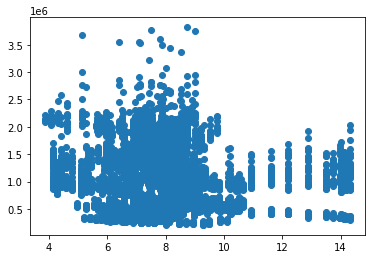

-0.10617608965795412


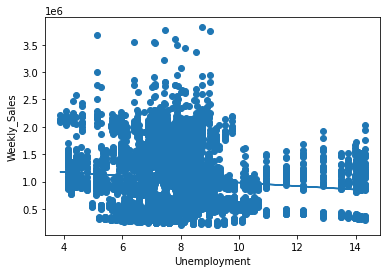

In [44]:
from sklearn.linear_model import LinearRegression
from scipy import stats
#Weekly sales vs Unemployment
x = data['Unemployment']
y = data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.plot(x, mymodel)
plt.show()

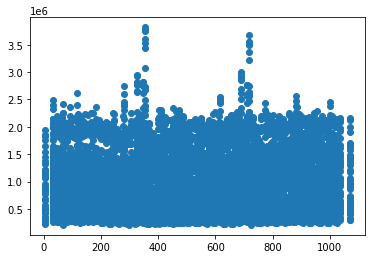

0.004591803306455429


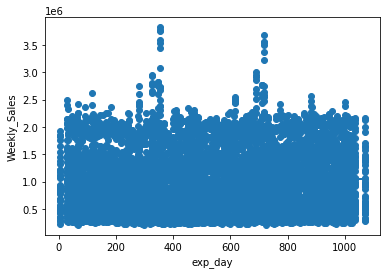

In [45]:
# Weekly_Sales vs exp_day
x = data['exp_day']
y = data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.xlabel('exp_day')
plt.ylabel('Weekly_Sales')
plt.plot(x, mymodel)
plt.show()

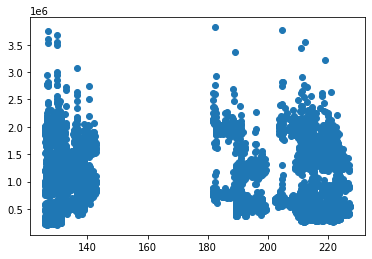

-0.07263416204017624


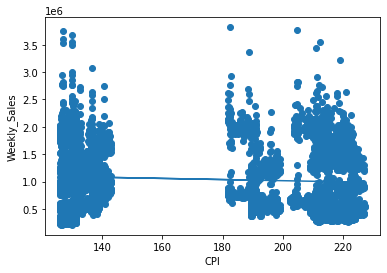

In [46]:
#Weekly sales vs CPI
x = data['CPI']
y = data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.plot(x, mymodel)
plt.show()

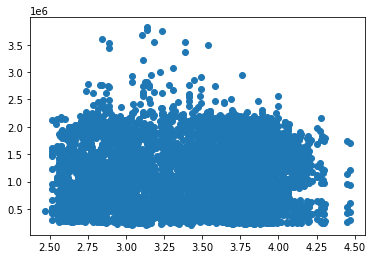

0.009463786314475135


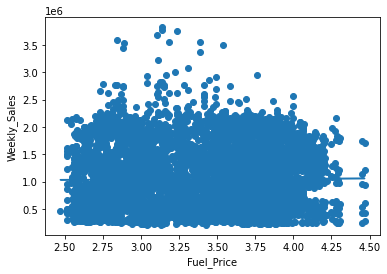

In [47]:
#Weekly sales vs Fuel price
x = data['Fuel_Price']
y = data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.plot(x, mymodel)
plt.show()

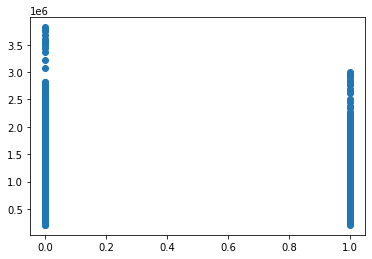

0.03689096801041455


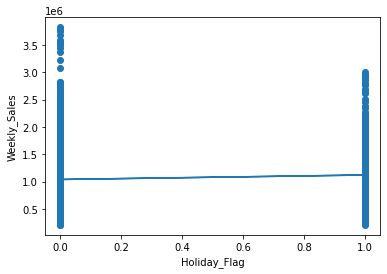

In [48]:
#Weekly sales vs Holidays
x = data['Holiday_Flag']
y = data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly_Sales')
plt.plot(x, mymodel)
plt.show()


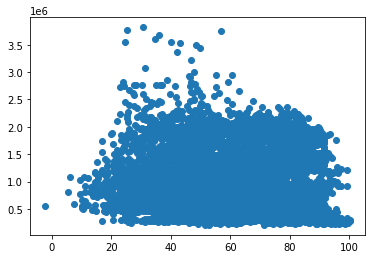

-0.06381001317946958


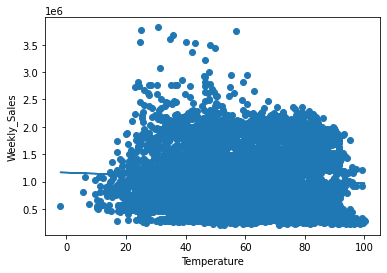

In [49]:
#Weekly sales vs Temperature
x = data['Temperature']
y = data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.plot(x, mymodel)
plt.show()

### Change dates into days by creating new variable.

In [50]:
#Change dates into days by creating new variable.
data['day'] = pd.to_datetime(data['Date']).dt.day_name()
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,semester,exp_day,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,H1,117,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,H2,331,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,H1,45,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,H1,52,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,H1,118,Monday


In [51]:
data['day'].head(10)

0      Sunday
1    Thursday
2      Friday
3      Friday
4      Monday
5      Friday
6      Friday
7      Friday
8    Thursday
9    Saturday
Name: day, dtype: object